# Lab 6 (27-02-2024)

This lab experiments help you master how to do Naive Bayes Classifier. We will be using Heart disease dfset. 

In [12]:
Registration_Number = "22011103048"
Name = "Roahith R"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Roahith R and my roll no : 22011103048
Computer IP Address is: 192.168.65.61


Read through [Naive Bayes Classifier](https://www.geeksforgeeks.org/naive-bayes-classifiers/)

Following experiments are expected
1. Perform monomial naive bayes classifier
    - Plot a graph for accuracy vs %test_df
    - Plot a graph for accuracy vs each feature for 80% test-train split
2. Perform Naive bayes classifier using Gaussian
    - Plot a graph for accuracy with addition of different features

In [13]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import  GaussianNB


In [14]:
# Load dfset 
df = pd.read_csv('heart_disease.csv')
df.head()

x = df.drop(['result'], axis=1)
y = df['result']

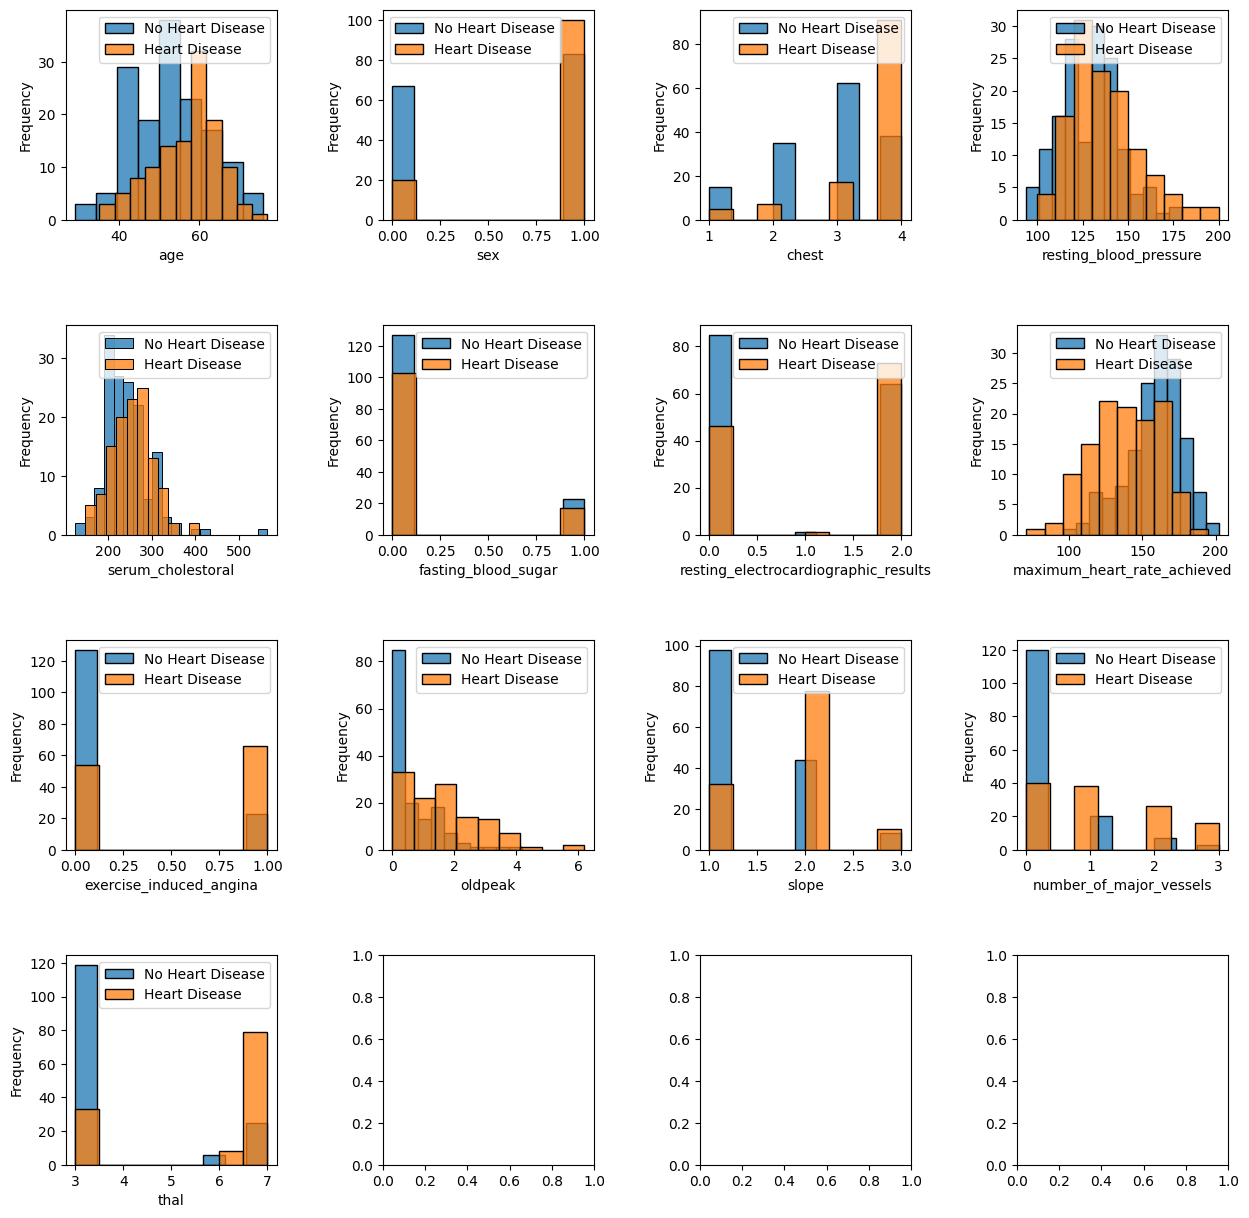

In [15]:
# Plot Gaussian curves for each feature column with respect to the target ('result')
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing between subplots
for i, column in enumerate(df.drop(columns=['result'], axis=1).columns.tolist()):
    ax = axes[i // 4, i % 4]
    sns.histplot(df[df['result'] == 0][column], label='No Heart Disease', ax=ax)
    sns.histplot(df[df['result'] == 1][column], label='Heart Disease', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()
plt.show()

In [16]:
# Monomial Gaussian Naive Bayes

# Lists to store accuracy scores
accuracy_vs_test_size = []
accuracy_vs_feature = []

# Range of test sizes to consider
test_sizes = [x/10 for x in range(1, 10)]

# Perform analysis for different test sizes
for test_size in test_sizes:
    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=1)
    
    # Training the model on training set
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Making predictions on the testing set
    y_pred = gnb.predict(X_test)
    
    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_vs_test_size.append(accuracy)


# Plot accuracy vs each feature for 80% test-train split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

for feature in x.columns:
    feature_accuracy = []
    # Replace feature values with random noise to see how it affects accuracy
    X_test_noisy = X_test.copy()
    X_test_noisy[feature] = 1000  # Replace the feature values with an arbitrary large number

    # Training the model on training set
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Making predictions on the noisy testing set
    y_pred_noisy = gnb.predict(X_test_noisy)

    # Calculate accuracy and append to list
    accuracy_noisy = accuracy_score(y_test, y_pred_noisy) * 100
    accuracy_vs_feature.append(accuracy_noisy)


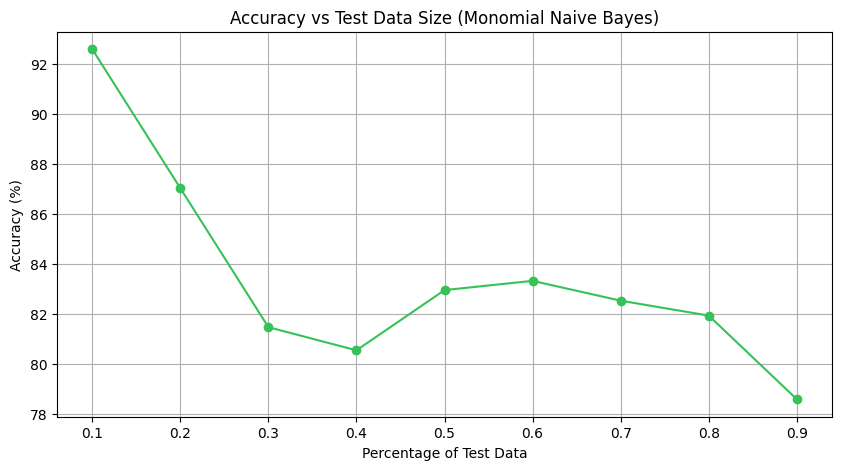

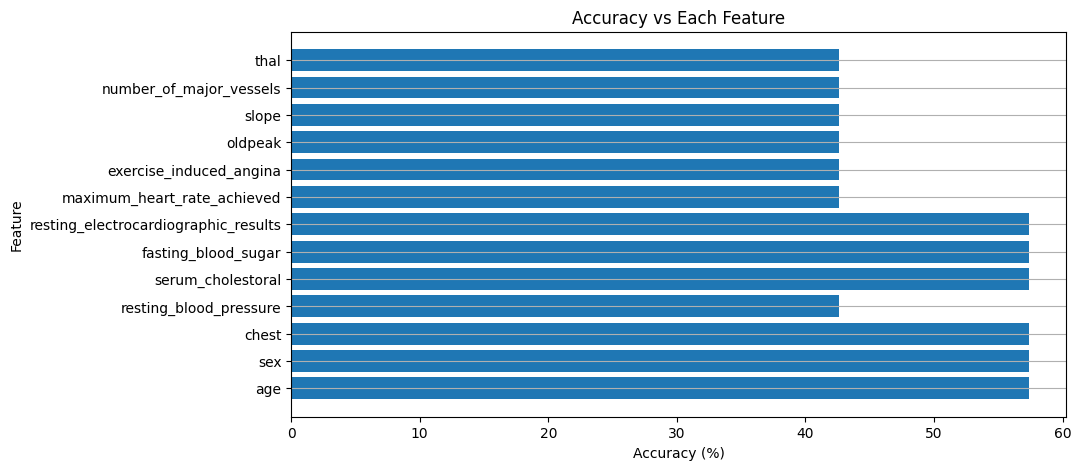

In [17]:
# Graph on accuracy

# Plot accuracy vs test data size
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, accuracy_vs_test_size, marker='o',color='#36c259')
plt.title('Accuracy vs Test Data Size (Monomial Naive Bayes)')
plt.xlabel('Percentage of Test Data')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

# Plot accuracy vs each feature
plt.figure(figsize=(10, 5))
plt.barh(x.columns, accuracy_vs_feature,)
plt.title('Accuracy vs Each Feature')
plt.xlabel('Accuracy (%)')
plt.ylabel('Feature')
plt.grid(axis='y')
plt.show()

In [18]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Multinomial Gaussian Naive Bayes

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Store the feature matrix (X) and response vector (y)
X = df.drop(['result'], axis=1)
y = df['result']

# Lists to store accuracy scores
accuracy_vs_test_size = []


# Range of test sizes to consider
test_sizes = [x/10 for x in range(1, 10)]

# Perform analysis for different test sizes
for test_size in test_sizes:
    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    
    # Scale features to be non-negative integers (assuming features are continuous)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert scaled features to non-negative integers
    X_train_counts = (X_train_scaled * 100).astype(int)
    X_test_counts = (X_test_scaled * 100).astype(int)
    
    # Training the model on training set
    mnb = MultinomialNB()
    mnb.fit(X_train_counts, y_train)
    
    # Making predictions on the testing set
    y_pred = mnb.predict(X_test_counts)
    
    # Calculate accuracy and append to list
    accuracy = metrics.accuracy_score(y_test, y_pred) * 100
    accuracy_vs_test_size.append(accuracy)



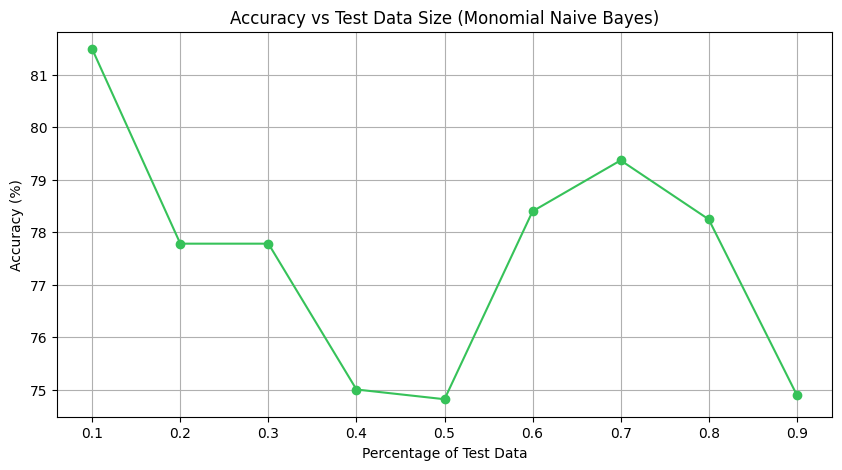

In [20]:
# Graph on accuracy
# Plot accuracy vs test data size
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, accuracy_vs_test_size, marker='o',color='#36c259')
plt.title('Accuracy vs Test Data Size (Monomial Naive Bayes)')
plt.xlabel('Percentage of Test Data')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()
